# ODI Batsman Data Analysis

This notebook performs an Exploratory Data Analysis (EDA) on the provided ODI batsman dataset.

## 1. Import Libraries and Load Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('batsman_data_odi.csv')
df.head()

,Player Name,Country,Time Period,Matches,Played,Not Outs,Runs,Highest Score,Batting Average,Balls Faced,Strike Rate,Centuries,Fifties,Ducks,Fours,Sixes
0,ST Jayasuriya,Sri Lanka,1990-2008,25,24,1,1220,130,53.04,1190,102.52,6,3,1,139,23
1,KC Sangakkara,Sri Lanka,2004-2014,24,23,1,1075,121,48.86,1272,84.51,4,8,2,107,7
2,SR Tendulkar,India,1990-2012,23,21,2,971,114,51.10,1136,85.47,2,7,0,108,8
3,Shoaib Malik,Pakistan,2000-2018,17,15,3,786,143,65.50,867,90.65,3,3,0,76,8
4,RG Sharma,India,2008-2018,22,21,5,745,111,46.56,877,84.94,1,6,1,60,17


## 2. Descriptive Statistics

We will now look at the summary statistics and data structure.

In [5]:
print('--- Dataset Info ---')
print(df.info())

print('\n--- Descriptive Statistics ---')
df.describe()

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player Name      50 non-null     object 
 1   Country          50 non-null     object 
 2   Time Period      50 non-null     object 
 3   Matches          50 non-null     int64  
 4   Played           50 non-null     int64  
 5   Not Outs         50 non-null     int64  
 6   Runs             50 non-null     int64  
 7   Highest Score    50 non-null     int64  
 8   Batting Average  50 non-null     float64
 9   Balls Faced      50 non-null     int64  
 10  Strike Rate      50 non-null     float64
 11  Centuries        50 non-null     int64  
 12  Fifties          50 non-null     int64  
 13  Ducks            50 non-null     int64  
 14  Fours            50 non-null     int64  
 15  Sixes            50 non-null     int64  
dtypes: float64(2), int64(11), object(3)
memory 

,Matches,Played,Not Outs,Runs,Highest Score,Batting Average,Balls Faced,Strike Rate,Centuries,Fifties,Ducks,Fours,Sixes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,14.060000,13.120000,2.100000,487.340000,99.360000,50.031000,582.200000,83.677800,0.920000,3.160000,0.580000,42.780000,6.660000
std,5.563768,5.137457,1.887121,215.852237,27.467799,32.193085,228.148537,15.652533,1.209486,1.909803,0.702474,25.264551,5.542452
min,4.000000,3.000000,0.000000,250.000000,50.000000,21.000000,281.000000,55.600000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,10.250000,9.250000,1.000000,317.000000,76.500000,35.482500,410.500000,76.275000,0.000000,2.000000,0.000000,26.250000,3.000000
50%,13.000000,12.000000,2.000000,443.500000,100.000000,44.420000,519.000000,82.955000,1.000000,3.000000,0.000000,38.500000,5.000000
75%,17.750000,14.750000,3.000000,586.500000,115.500000,58.125000,677.000000,89.792500,1.000000,4.000000,1.000000,50.500000,8.750000
max,28.000000,26.000000,6.000000,1220.000000,183.000000,251.000000,1272.000000,140.740000,6.000000,8.000000,3.000000,139.000000,26.000000


### Inferences from Descriptive Statistics:
- The dataset contains 50 players with 16 attributes.
- The average score of a player in this dataset is approximately 487 runs.
- Strike rates vary significantly, with a mean around 83.6.
- There's a wide range in Batting Average (21 to 251), suggesting potential outliers or special cases (like high 'Not Outs').

## 3. Univariate Analysis

Analyzing variables one by one.

### distribution of Runs

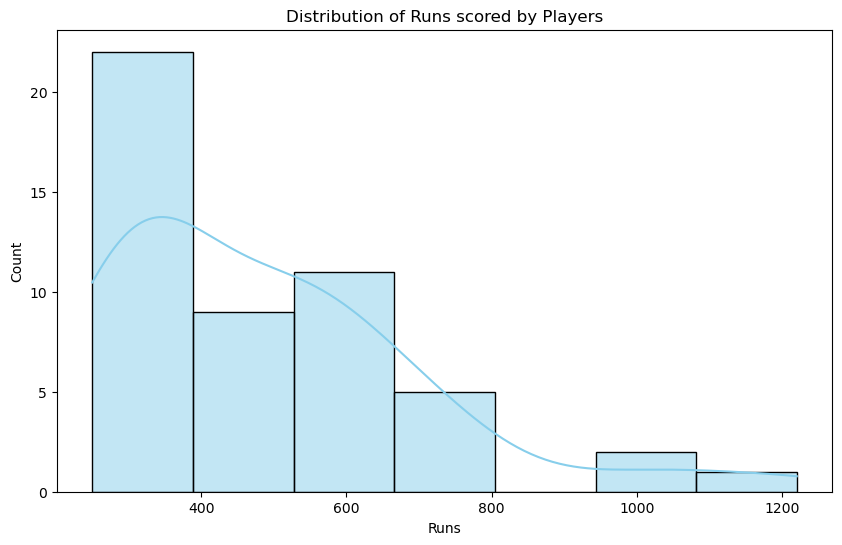

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Runs'], kde=True, color='skyblue')
plt.title('Distribution of Runs scored by Players')
plt.show()

- The distribution of runs is right-skewed, meaning many players have scored between 250 and 600 runs, while only a few have reached over 1000 runs.

### Player Counts by Country

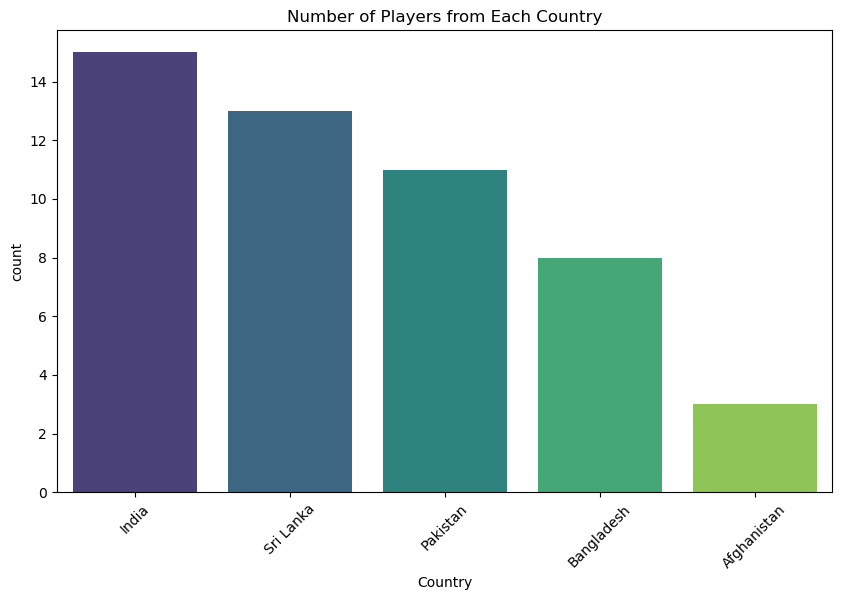

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', palette='viridis', order=df['Country'].value_counts().index)
plt.title('Number of Players from Each Country')
plt.xticks(rotation=45)
plt.show()

- This plot shows which countries are most represented in the top 50 list. Sri Lanka, India, and Pakistan appear frequently.

### Batting Average Boxplot

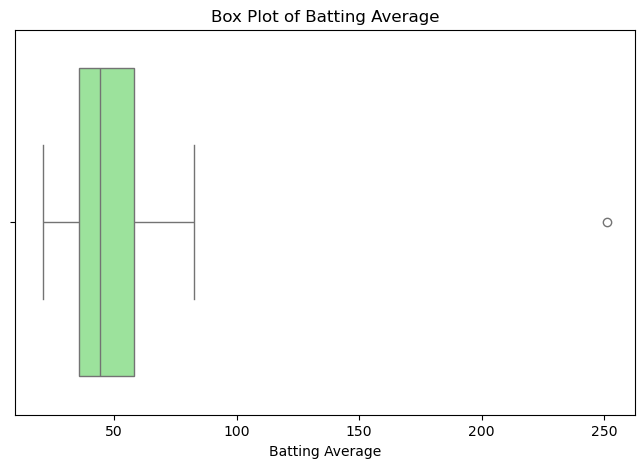

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Batting Average'], color='lightgreen')
plt.title('Box Plot of Batting Average')
plt.show()

- We can see a few outliers on the higher side of the batting average. These might be players with many not-out innings.

## 4. Bivariate Analysis

Analyzing relationships between two variables.

### Runs vs Balls Faced

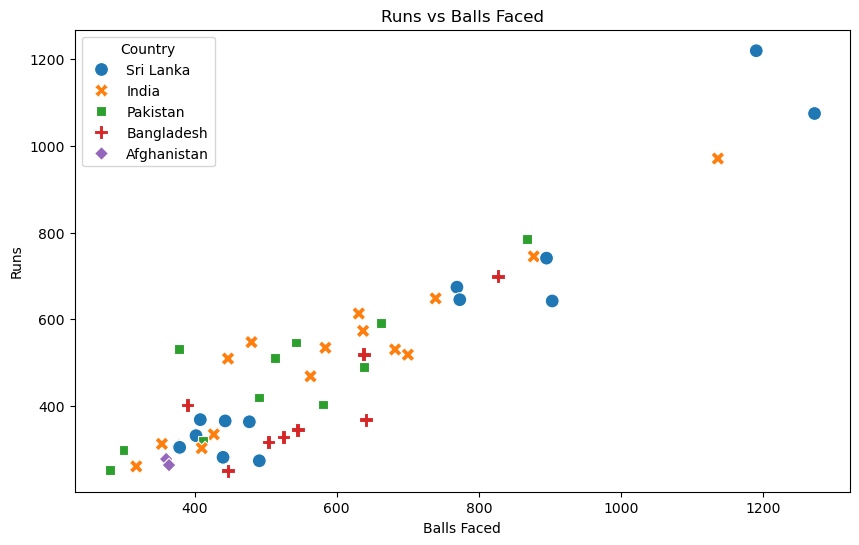

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balls Faced', y='Runs', hue='Country', style='Country', s=100)
plt.title('Runs vs Balls Faced')
plt.show()

- There is a strong linear relationship between Balls Faced and Runs, as expected. Players who play more deliveries tend to score more runs.

### Strike Rate vs Centuries

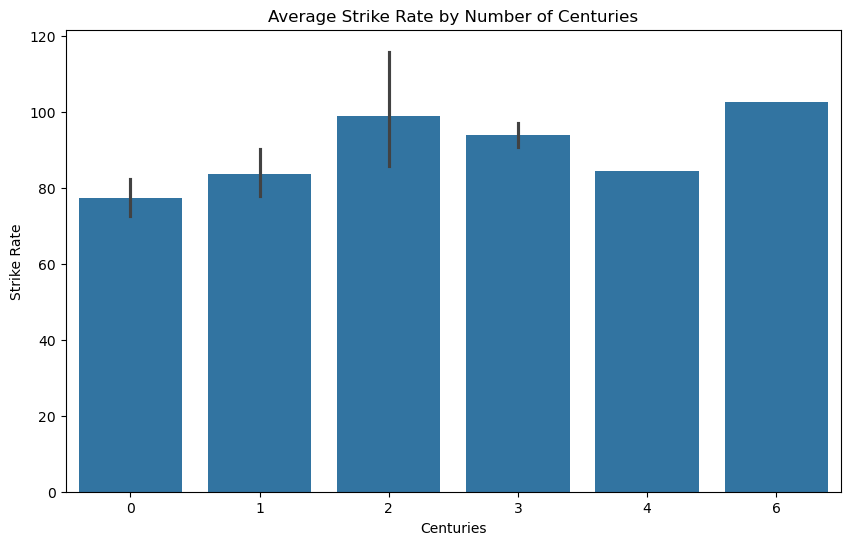

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Centuries', y='Strike Rate', estimator='mean')
plt.title('Average Strike Rate by Number of Centuries')
plt.show()

- This analysis helps determine if players with more centuries also tend to play more aggressively (higher strike rates).

### Batting Average across Countries

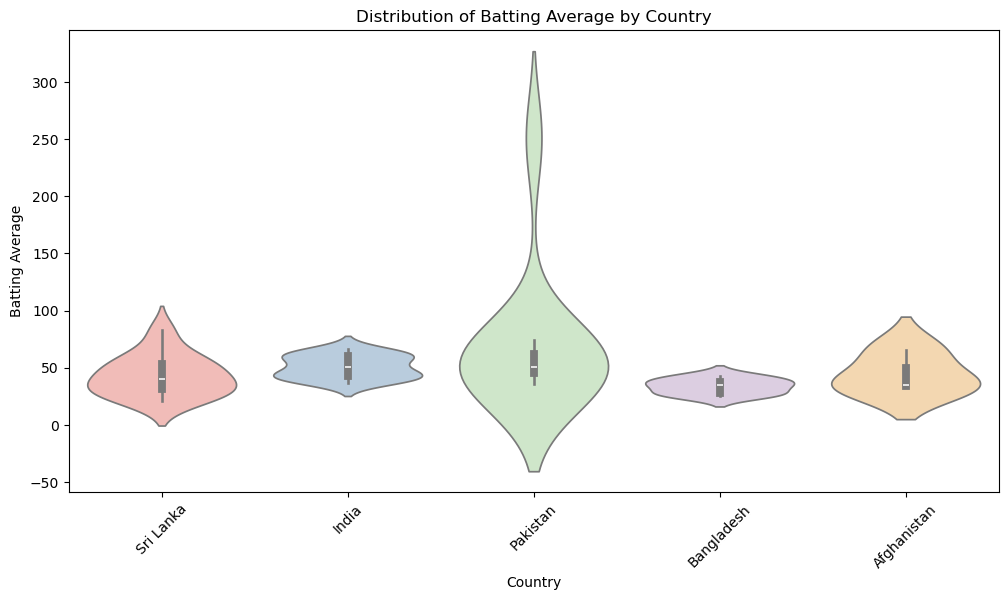

In [25]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Country', y='Batting Average', palette='Pastel1')
plt.title('Distribution of Batting Average by Country')
plt.xticks(rotation=45)
plt.show()

- Violin plots show the density and range of batting averages for each country. Some countries have a more concentrated spread than others.

## 5. Multivariate Analysis

Analyzing three or more variables simultaneously.

### Correlation Heatmap

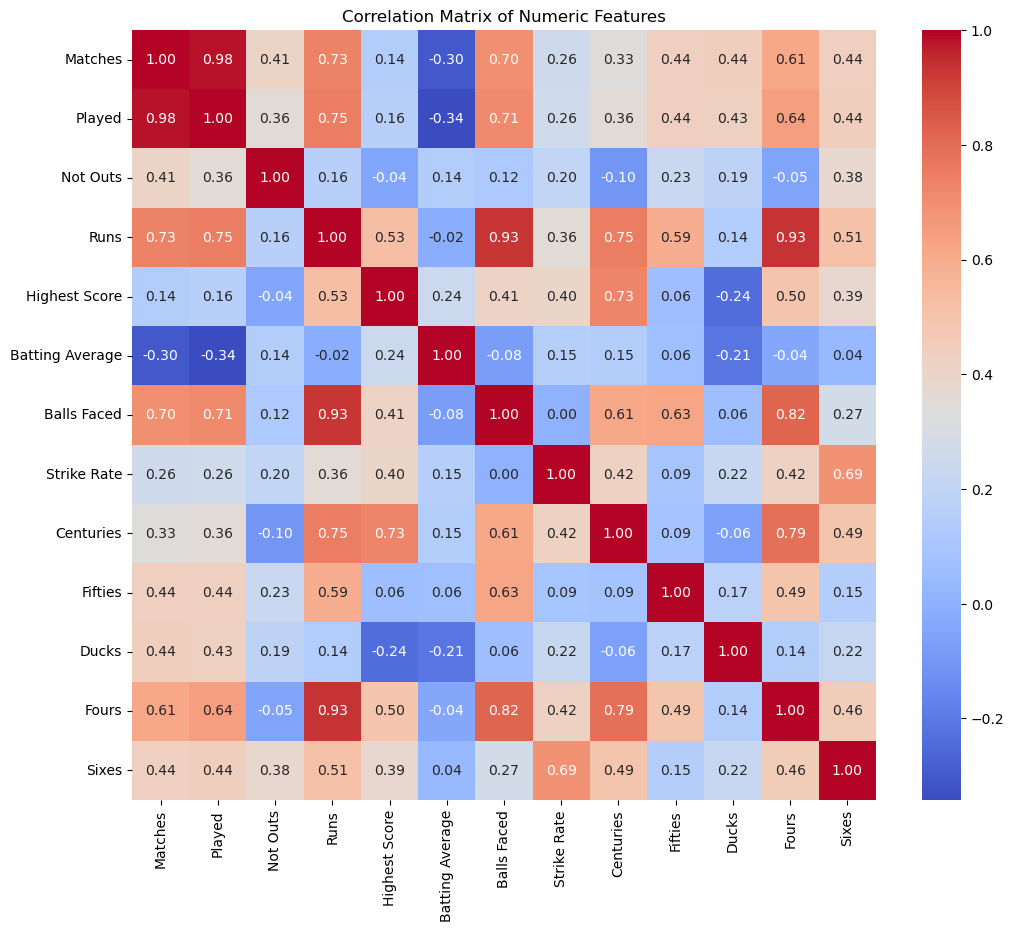

In [29]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

- Strong correlations are observed between Runs, Balls Faced, Fours, and Centuries. Strike Rate has a lower correlation with the total volume of runs.

### Pairplot of Key Performance Metrics

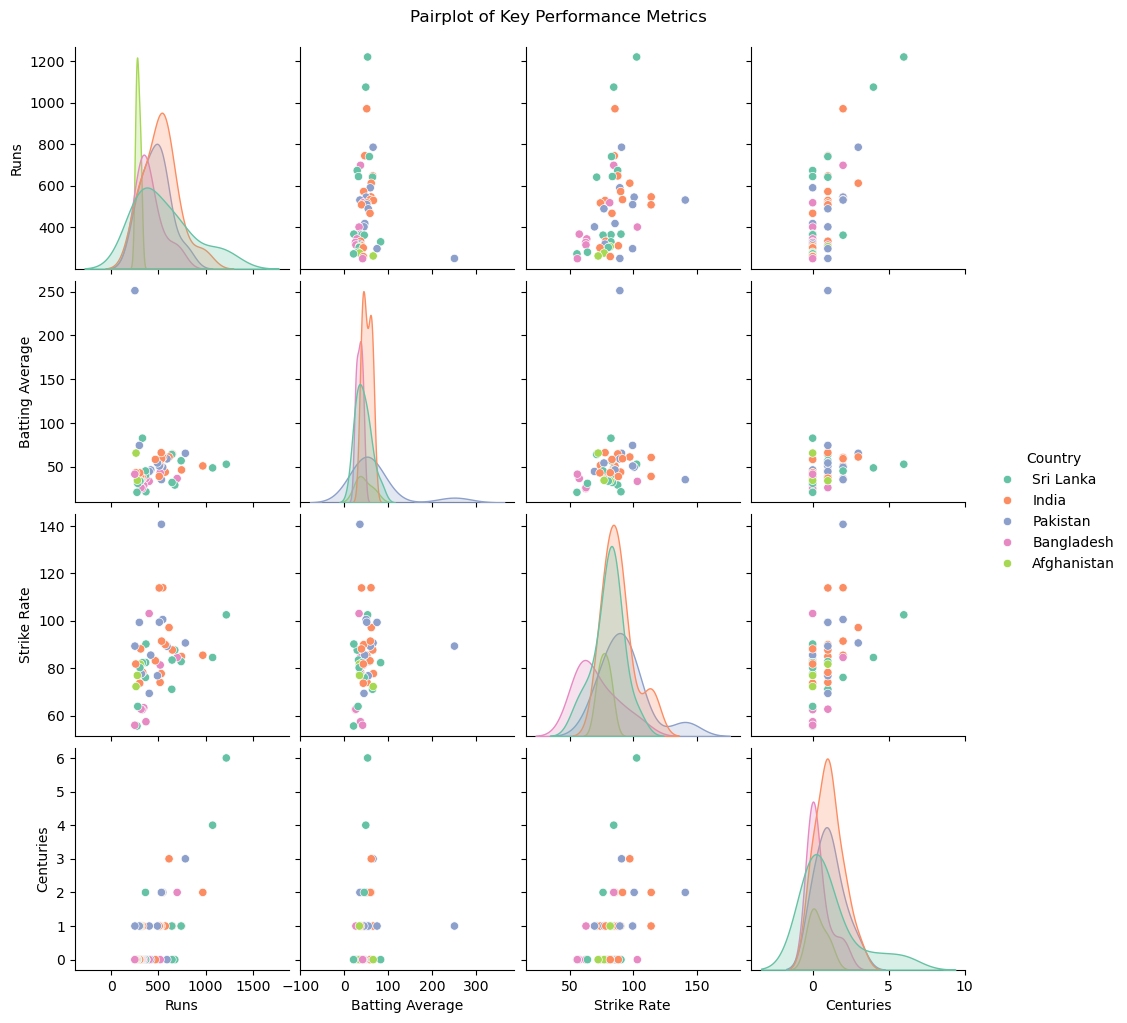

In [32]:
key_metrics = ['Runs', 'Batting Average', 'Strike Rate', 'Centuries']
sns.pairplot(df[key_metrics + ['Country']], hue='Country', palette='Set2')
plt.suptitle('Pairplot of Key Performance Metrics', y=1.02)
plt.show()

- The pairplot provides a comprehensive view of relationships and distributions across different countries simultaneously.

### Runs vs Strike Rate by Country (Bubble Chart style)

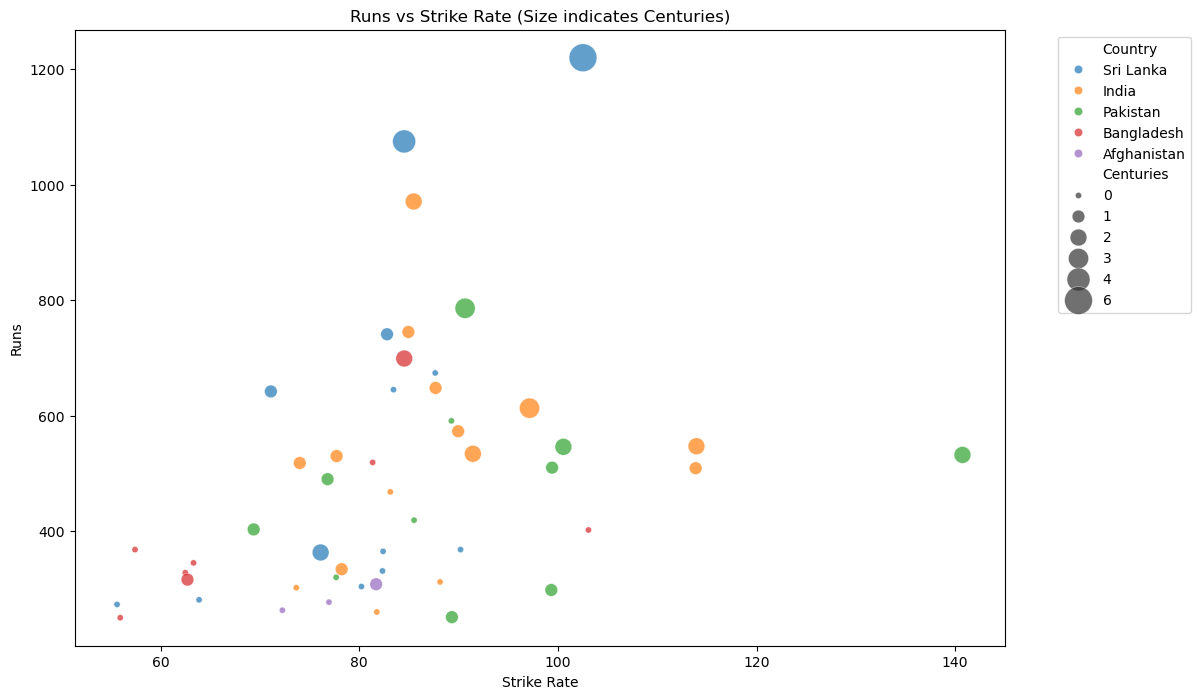

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Strike Rate', y='Runs', size='Centuries', hue='Country', sizes=(20, 400), alpha=0.7)
plt.title('Runs vs Strike Rate (Size indicates Centuries)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

- This multivariate plot visualizes how scoring volume relates to scoring speed, with the bubble size indicating the number of centuries and color representing the country.

## 6. Conclusion

- The data highlights top performers like Jayasuriya and Sangakkara.
- Key performance indicators like Runs and Balls Faced are highly correlated.
- There is diversity in player profiles across different cricketing nations.